In [1]:
%pip install numpy matplotlib

import numpy as np
import matplotlib.pyplot as plt

# Load data
data = np.load("blurring.npz")
X = data['X']
y = data['y']

U, S, Vt = np.linalg.svd(X, full_matrices=False)

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# 1

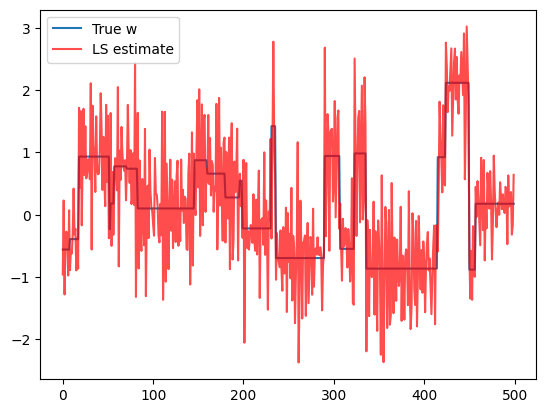

In [2]:

# Part 1.c.i.
# Estimate w using X and y with regular least squares
# Your code here

# Part 1.c.i.
# Estimate w using X and y with regular least squares
w_LS = Vt.T @ np.diag(1/S) @ U.T @ y

plt.plot(data['w'], label='True w')
plt.plot(w_LS, alpha=0.7, c='red', label='LS estimate')
plt.legend()
plt.show()

Standard least squares do nothing to account for the noise added to the observed variable y. This means that our estimate includes is a noisy approximation of w.

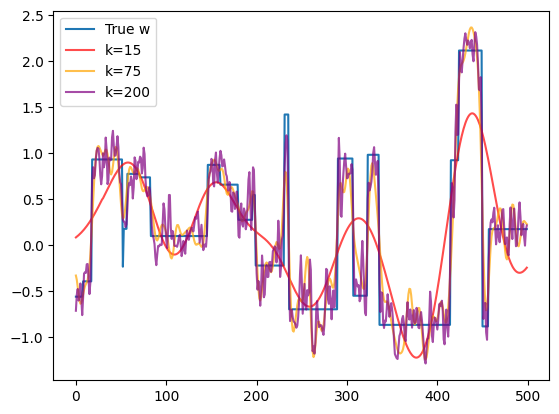

In [6]:
# Part 1.c.ii.
# Estimate w using X and y with truncated SVD

w_15 = Vt[:15,:].T @ np.diag(1/S[:15]) @ U[:, :15].T @ y
w_75 = Vt[:75,:].T @ np.diag(1/S[:75]) @ U[:, :75].T @ y
w_200 = Vt[:200,:].T @ np.diag(1/S[:200]) @ U[:, :200].T @ y

plt.plot(data['w'], label='True w')
plt.plot(w_15, alpha=0.7, c='red', label='k=15')
plt.plot(w_75, alpha=0.7, c='orange', label='k=75')
plt.plot(w_200, alpha=0.7, c='purple', label='k=200')
plt.legend()
plt.show()

Truncated SVD solutions usually do better than standard least squares because they're less sensitive to noise. By discarding small singular values, we reduce the number of basis vectors, which filters components that are strongly affected by noise. This, unforunately, also lowers the quality of the estimate; it smooths it out too much such that some of the real signal is removed.

# 2

In [7]:
# b
A = np.matrix([[0,0,0,1], [1,0,0,0], [0,0.5,0,0], [0,0.5,1,0]])
pi = np.matrix([0.25,0.25,0.25,0.25]).T

alpha = 1
G = alpha*A + (1-alpha)*np.ones(A.shape)
G = G/G.sum(axis=0)

for k in range(100):
    pi = G @ pi

print(pi)

[[0.28571419]
 [0.2857141 ]
 [0.14285725]
 [0.28571447]]


In [8]:
# c
alpha = 0.8
G = alpha*A + (1-alpha)*np.ones(A.shape)
G = G/G.sum(axis=0)

for k in range(100):
    pi = G @ pi

print(pi)

[[0.26724138]
 [0.25862069]
 [0.18965517]
 [0.28448276]]


# 3


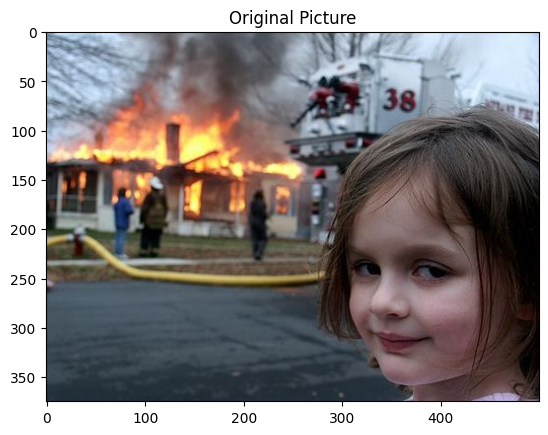

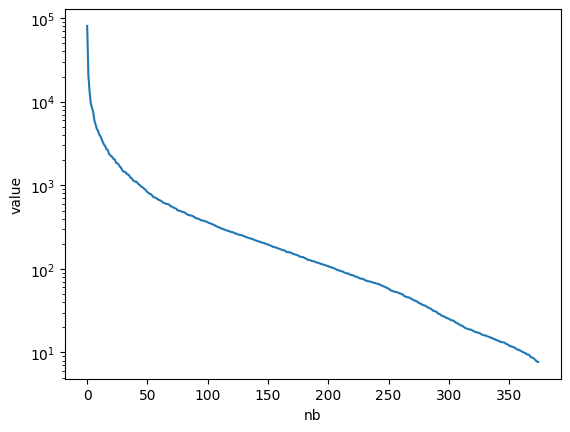

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# feel free to use your favorite picture
# or work with the provided one
img = Image.open("disaster-girl.jpg", mode="r")
img = np.array(img).astype(np.int32)

plt.imshow(img)
plt.title('Original Picture')
plt.show()

# YOUR CODE BELOW
# extract and plot the singular values for each color channel
img_stack = img.reshape((img.shape[0], -1))
u, s, v = np.linalg.svd(img_stack, full_matrices=False)

plt.plot(s)
plt.xlabel('nb')
plt.ylabel('value')
plt.yscale('log')

In [12]:
def compress(image, k):
    """
    Perform svd decomposition and truncate it (using k singular values/vectors)

    Parameters:
        image (np.array):        input image

        k (int):                 approximation rank

    --------
    Returns:
      reconst_matrix (np.array): reconstructed image

      s (np.array):              array of singular values
    """

    # YOUR CODE IS HERE
    img_shape = image.shape

    if len(img_shape) == 3:
        reconst_matrx = np.zeros(img_shape)
        s = []
        for i in range(3):
            u, si, v = np.linalg.svd(image[:,:,i], full_matrices=False)
            reconst_matrx[:,:,i] = u[:,:k] @ np.diag(si[:k]) @ v[:k,:]
            s.append(si[:k])
        reconst_matrix = np.array(reconst_matrx, np.int32)
    else:
        u, s, v = np.linalg.svd(image, full_matrices=False)
        reconst_matrix = u[:,:k] @ np.diag(s[:k]) @ v[:k,:]

    return reconst_matrix, s

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-29..288].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-25..285].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-14..270].


Text(0.5, 1.0, '$rank(M_\\varepsilon) = 50$')

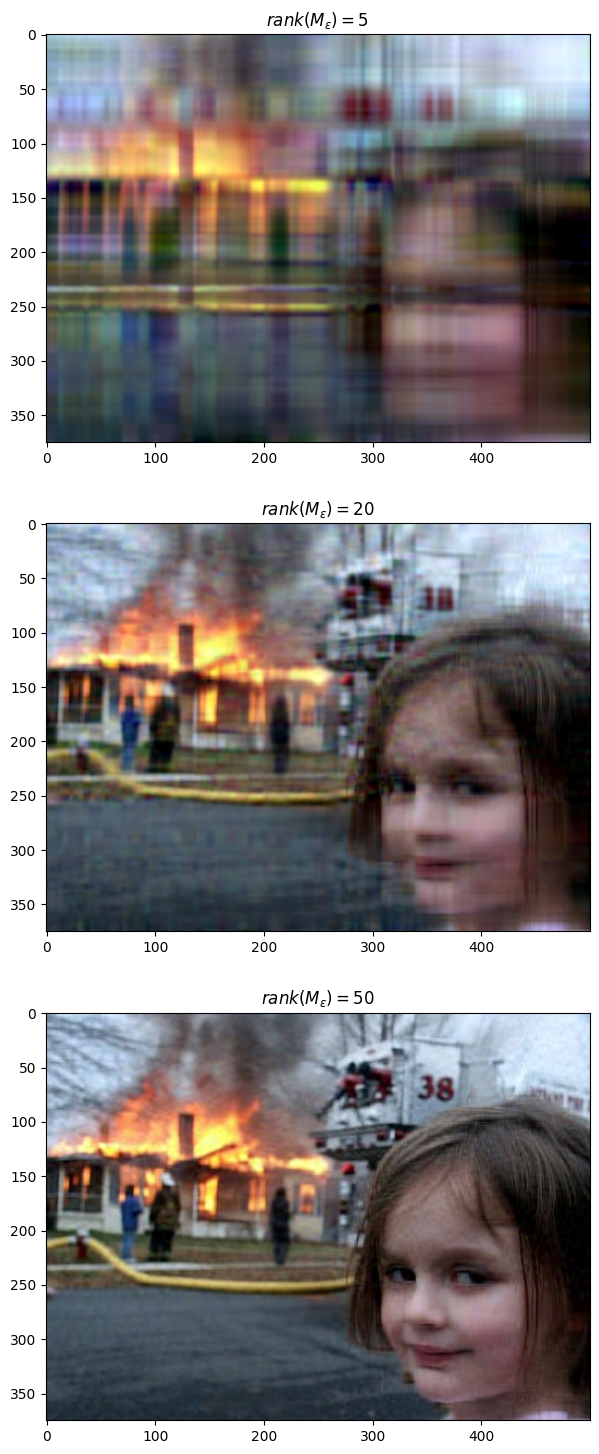

In [13]:
reconst_img_5,_ = compress(img, 5)
reconst_img_20, _ = compress(img, 20)
reconst_img_50, _ = compress(img, 50)

fig = plt.figure(figsize=(18, 18))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

plt.subplot(311)
plt.imshow(reconst_img_5)
plt.title(r'$rank(M_\varepsilon) = 5$')

plt.subplot(312)
plt.imshow(reconst_img_20)
plt.title(r'$rank(M_\varepsilon) = 20$')

plt.subplot(313)
plt.imshow(reconst_img_50)
plt.title(r'$rank(M_\varepsilon) = 50$')

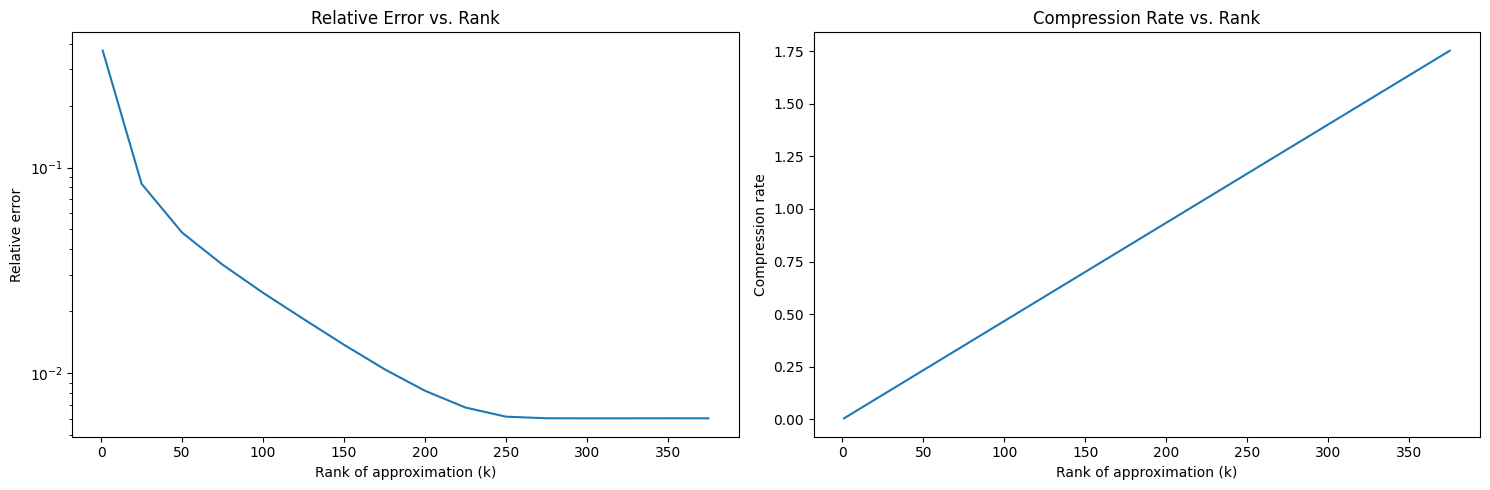

In [15]:

# c
def rel_error(image, k):
    """
    Compute the relative error between the original image and its rank k approximation

    Parameters:
        image (np.array):    original image

        k (int):             approximation rank

    --------
    Returns:
        error (float):      relative error
    """
    # YOUR CODE IS HERE
    img_shape = image.shape
    compressed_img, _ = compress(image, k)
    d = image - compressed_img
    error = np.linalg.norm(d) / np.linalg.norm(image)

    return error


def compression_rate(image, k):
    """
    Compute the compression rate of the image when approximated by its rank k SVD

    Parameters:
        image (np.array):    original image

        k (int):             approximation rank

    --------
    Returns:
        comp_rate (float):  compression rate
    """
    # YOUR CODE IS HERE
    m, n = image.shape[:2]
    if len(image.shape) == 3:
        original_size = m * n * 3
        compressed_size = (m * k + k + k * n) * 3
    else:  # Grayscale case
        original_size = m * n
        compressed_size = m * k + k + k * n

    comp_rate = compressed_size / original_size
    return comp_rate

img_channel_1 = img[:, :, 0]  # Use first channel for grayscale analysis
ranks = np.linspace(1, 375, 16, dtype=int)  # Start from 1 to avoid division issues
error = []
compress_ratio = []

for i in ranks:
    error.append(rel_error(img, i))
    compress_ratio.append(compression_rate(img_channel_1, i))

# Plotting
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.plot(ranks, error)
plt.xlabel("Rank of approximation (k)")
plt.ylabel("Relative error")
plt.title("Relative Error vs. Rank")
plt.yscale("log")

plt.subplot(122)
plt.plot(ranks, compress_ratio)
plt.xlabel("Rank of approximation (k)")
plt.ylabel("Compression rate")
plt.title("Compression Rate vs. Rank")
plt.tight_layout()
plt.show()

# c, 1.
The relative error decreases rapidly as k increases from 1 to about 50, showing that the first few singular values capture most of the image's important structural information. Beyond k=100, the error reduction slows significantly; thi smeans that more values from here contribute less to reconstruction quality. This behavior reflects how SVD naturally orders components by their importance to the image's energy. The plateau in error at higher k values suggests that most visually meaningful information is contained within the top 100-150 singular values for this particular image.

# c, 2.
The compression rate increases linearly with k because the storage requirements grow proportionally with the number of retained singular values and vectors. For a rank k approximation, we store k singular values plus the first k columns of U and rows of V^T. The linear relationship shows a direct trade-off; this means that lower k gives better compression but poorer quality, while higher k improves quality at the cost of reduced compression. Thus, larger images will have a shallower slope, meaning more compression can be achieved at the same k value compared to smaller images. The break-even point (compression rate = 1) occurs when k equals the smaller dimension of the image matrix.